In [ ]:

import json
results = {}
model = 'dino'
with open(f'predictions_{model}.json') as f:
  data_preds = json.load(f)

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('CH2_final_evaluation.csv')

In [23]:
df.tail()

,frame_id,steering_angle,public
5609,1479425721681585081,-0.089012,1
5610,1479425721731673391,-0.087266,0
5611,1479425721781662176,-0.088026,1
5612,1479425721831580656,-0.087266,1
5613,1479425721881751009,-0.087266,0


In [24]:
preds = np.array(list(data_preds.values()))

In [25]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
fit1 = SimpleExpSmoothing(preds).fit(smoothing_level=0.4,optimized=True)

/home/ibraa04/miniconda3/envs/comma/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [26]:
preds = fit1.fittedvalues

In [27]:
preds.max()

np.float64(0.0018724927461599506)

In [28]:
preds_public = preds[df['public'] == 1].reshape(-1)

In [29]:
scores_public = df[df['public'] == 1].steering_angle.values

In [30]:
results['public'] = np.sqrt(((preds_public - scores_public) ** 2).mean())

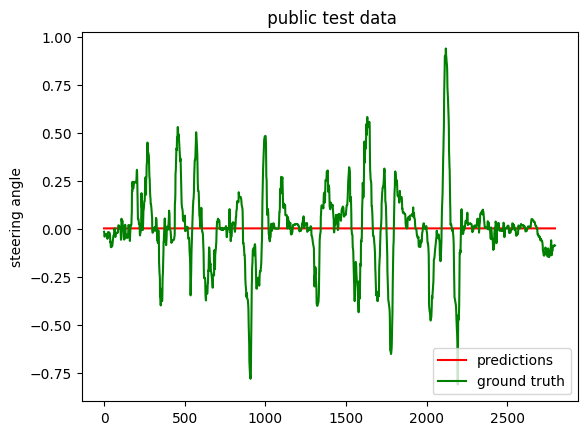

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(len(preds_public)),preds_public, c='r')
plt.plot(range(len(preds_public)),scores_public, c='g')
plt.title(f'{model} public test data')
plt.legend(["predictions", "ground truth"], loc ="lower right")
plt.ylabel('steering angle')
plt.savefig(f'{model}_public.png')

In [32]:
preds_private = preds[df['public'] == 0].reshape(-1)

In [33]:
scores_private = df[df['public'] == 0].steering_angle.values

In [34]:
results['private'] = np.sqrt(((scores_private - preds_private) ** 2).mean())

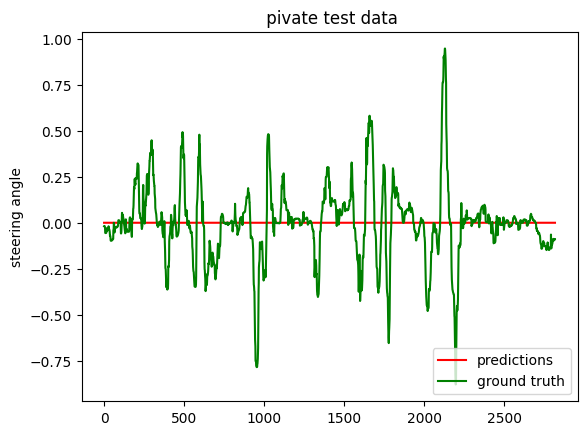

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(len(preds_private)),preds_private, c='r' )
plt.plot(range(len(scores_private)),scores_private, c='g' )
plt.title(f'{model} pivate test data')
plt.legend(["predictions", "ground truth"], loc ="lower right")
plt.ylabel('steering angle')
plt.savefig(f'{model}_private.png')

# Smoothed Results Transformer + Optical Flow

In [36]:
results

{'public': np.float64(0.2067437932747112),
 'private': np.float64(0.20857492549756507)}

# True results Transformer + Optical Flow



In [37]:
results

{'public': np.float64(0.2067437932747112),
 'private': np.float64(0.20857492549756507)}

# Simple Transformer

In [38]:
results

{'public': np.float64(0.2067437932747112),
 'private': np.float64(0.20857492549756507)}

# Transfer Learning

In [39]:
results

{'public': np.float64(0.2067437932747112),
 'private': np.float64(0.20857492549756507)}

# DAVE2

In [40]:
results

{'public': np.float64(0.2067437932747112),
 'private': np.float64(0.20857492549756507)}

# CNN-LSTM

In [41]:
results

{'public': np.float64(0.2067437932747112),
 'private': np.float64(0.20857492549756507)}

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_data)),train_data, c='g' )
plt.title(f'Training Data')
plt.legend([ "ground truth"], loc ="lower right")
plt.ylabel('steering angle')
plt.savefig('train_data.png')

NameError: name 'train_data' is not defined